In [6]:
# result_file = 'result.csv'
result_file = 'result_sklearn.csv'
model = 'nyc-taxi-green-dec-2016_d10_l481_n961_20241010111047'

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
0,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,0,0.000000,nyc-taxi-green-dec-2016,1G,1,2.293448
1,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,1,0.415543,nyc-taxi-green-dec-2016,1G,1,1.988738
2,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,2,0.415543,nyc-taxi-green-dec-2016,1G,1,1.909502
3,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,1,0.826135,nyc-taxi-green-dec-2016,1G,1,2.164496
4,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,2,0.826135,nyc-taxi-green-dec-2016,1G,1,2.019414
5,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,1,1.236728,nyc-taxi-green-dec-2016,1G,1,1.910361
6,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,2,1.236728,nyc-taxi-green-dec-2016,1G,1,1.750604
7,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,1,1.647320,nyc-taxi-green-dec-2016,1G,1,1.636265
8,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,2,1.647320,nyc-taxi-green-dec-2016,1G,1,1.366813
9,nyc-taxi-green-dec-2016_d10_l481_n961_20241010...,1,2.057912,nyc-taxi-green-dec-2016,1G,1,1.442015


In [8]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 2.383271846889208)

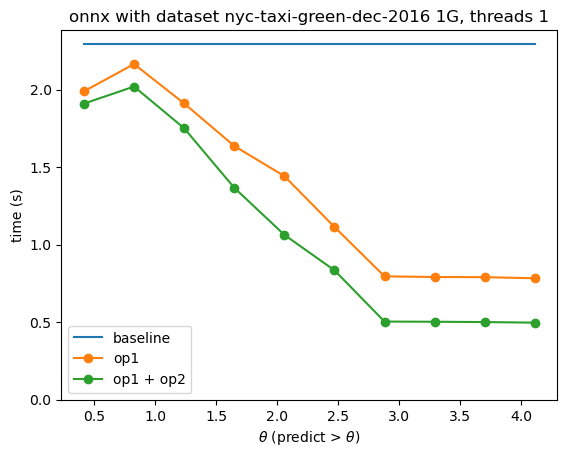

In [9]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 4.795624145312881)

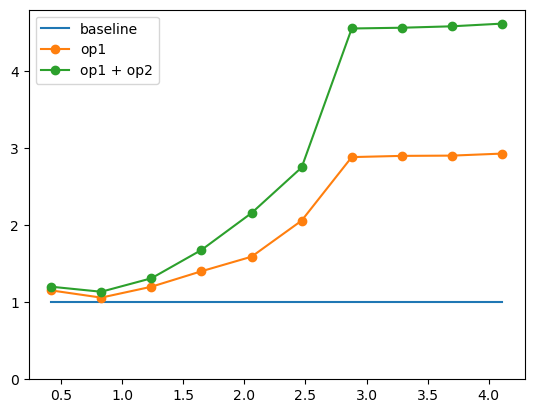

In [10]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)